In [37]:
import kagglehub

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV,train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

2. Load the Diabetes Dataset

In [38]:
# Define the dataset path
dataset_path = "/Users/Dataghost/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1/diabetes.csv"

# Load the dataset
df = pd.read_csv(dataset_path, encoding="ISO-8859-1")

# Display the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 3. Preprocess the Data

In [39]:
# Separate features (X) and target variable (y)


X = df.drop(columns=['Outcome']) # Features

y = df['Outcome']  # Target (0 = No Diabetes, 1 = Diabetes)

In [40]:
# Split dataset into Training (80%) and Testing (20%)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42, stratify= y)

In [41]:
# Standardize the features (scale all values to a similar range)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

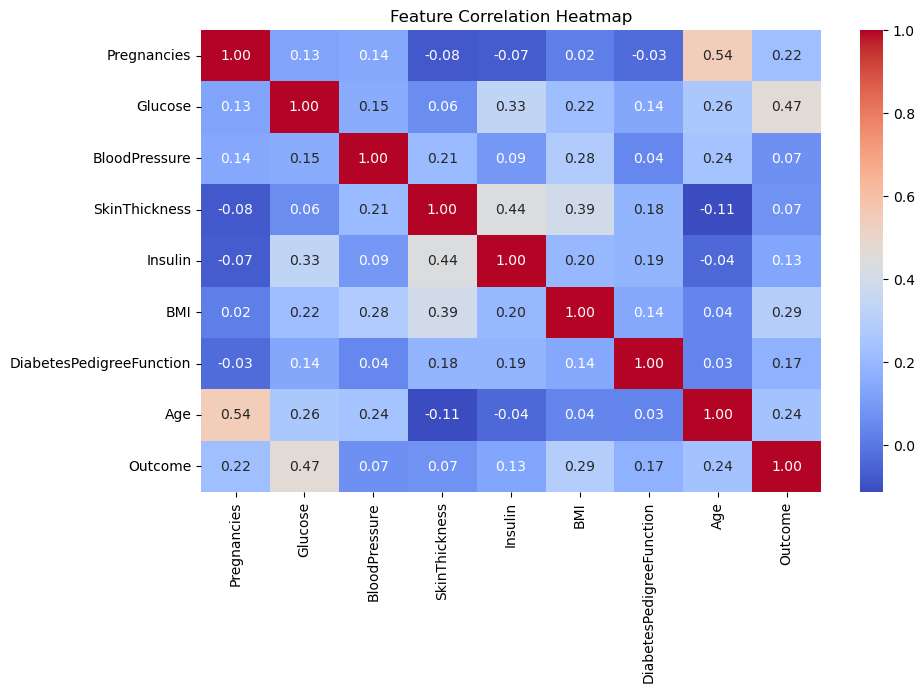

In [42]:
# Correlation heatmap

plt.figure(figsize=(10,6))

sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Feature Correlation Heatmap')

plt.show()

 Why? Features that are highly correlated with the outcome contribute more to predictions.

 Step 2: Hyperparameter Tuning with Grid Search

In [43]:
# Define parameter grid

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
              'solver' :['liblinear', 'lbfgs']}


# Perform Grid Search

grid_search = GridSearchCV(LogisticRegression(),
               param_grid,
               cv=5,
               scoring='accuracy'
               
               )

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [44]:
# Best parameters

print(f'Best Parameters = {grid_search.best_params_}')

Best Parameters = {'C': 0.1, 'solver': 'liblinear'}


In [45]:
# Train with best parameters

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)

In [46]:
# Evaluate

print(f"Optimized Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Optimized Model Accuracy: 0.7078


Why? Finding the best values for C (regularization strength) and solver improves accuracy.

Step 3: Handling Imbalanced Data
The dataset has more "non-diabetic" cases than "diabetic," which may bias the model.
We can use SMOTE (Synthetic Minority Over-sampling Technique) to balance classes.

In [47]:
# Apply SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [48]:
# Train Logistic Regression with SMOTE data

model_smote = LogisticRegression()

model_smote.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [49]:
# Predictions & Evaluation

y_pred_smote = model_smote.predict(X_test_scaled)

print(f'Accuracy of SMOTE Model : {accuracy_score(y_test, y_pred_smote): .4f}')

Accuracy of SMOTE Model :  0.7403


Why? Balancing the dataset improves recall and reduces false negatives.